<a href="https://colab.research.google.com/github/kashafnaveed123/KMeansClustering/blob/main/KMeansClustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised KMeans Clustering**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
# iris
data=iris.data[:,:2]
data

In [72]:
# Initialize Parameters
K=4
#Means that the algorithm's loop can run 100 times but not exceed from this...
#If it exceeds then the function will stop and this is also called 'stop condition' to avoide infinite loop.
max_iters=100
# if the centriod is differ about 1e-4 from the previous position of centriod then consider it that the cluster is settled
tol=1e-4

# Randomly Initialize centriods
np.random.seed(42)
# to maintain the consistency between shuffled indexes
random_index=np.random.permutation(data.shape[0])[:K]
random_index
centroids=data[random_index]
centroids

array([[6.1, 2.8],
       [5.7, 3.8],
       [7.7, 2.6],
       [6. , 2.9]])

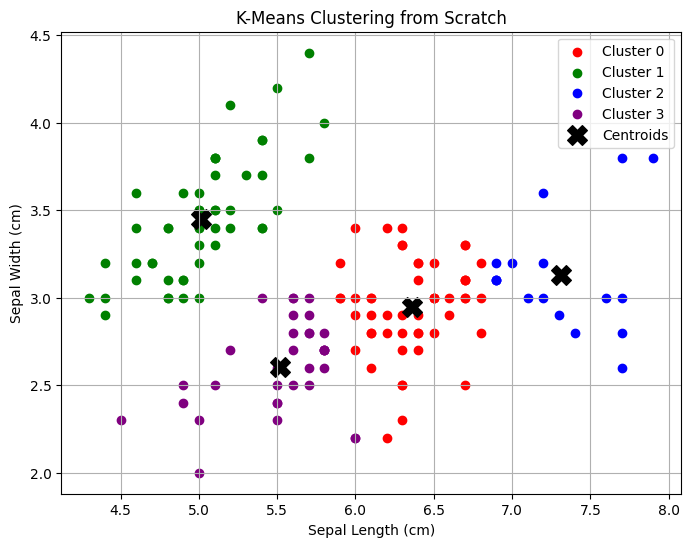

In [80]:
def euclidean_distance(a,b):
  return np.linalg.norm(a - b)

# function to assigning the points to the clusters
def assign_clusters(data,centroids):
  clusters=[]
  for point in data:
     distances=[euclidean_distance(point , centroid) for centroid in centroids]
     cluster=np.argmin(distances)
     clusters.append(cluster)
  return np.array(clusters)

# function to update centriod
def update_centriods(data,clusters,K):
  new_centroids=[]
  for k in range (K):
    cluster_points=data[clusters == k]
    if len(cluster_points)>0:
      new_centroid=cluster_points.mean(axis=0);
    else:
      new_centroid=data[np.random.choice(data.shape[0])]
    new_centroids.append(new_centroid)
  return np.array(new_centroids)

# k mean loop:
for i in range(max_iters):
  clusters=assign_clusters(data,centroids);
  new_centroids=update_centriods(data,clusters,K)

      # Check convergence
  if np.all(np.abs(new_centroids - centroids) < tol):
        break
  centroids = new_centroids

# Plotting final clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple']
for k in range(K):
    cluster_points = data[clusters == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[k], label=f'Cluster {k}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering from Scratch')
plt.legend()
plt.grid(True)
plt.show()


# **By Using sklearn Library**

In [92]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns

In [96]:
# load datasets
dataset=load_iris()
# dataset
df=pd.DataFrame(dataset.data , columns=dataset.feature_names)
# dataset.feature_names
# dataset.data

# using KMeans
kmeans= KMeans(n_clusters=4,random_state=42)

df['cluster']=kmeans.fit_predict(df)


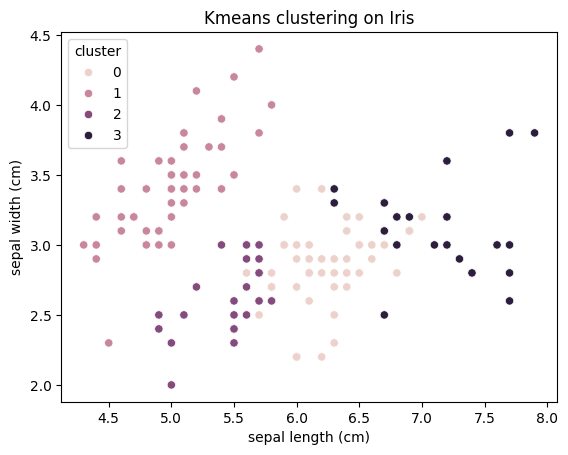

In [103]:
sns.scatterplot(x='sepal length (cm)' , y='sepal width (cm)', hue='cluster' , data=df)
plt.title('Kmeans clustering on Iris')
plt.show()